## Train different Support Vector Classifiers

In [2]:
# Import libraries
from sklearn import datasets, svm
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

df = pd.read_csv('./data/preprocessed.csv')
# Scale data
scaler = StandardScaler()
for i in range(5):
    df.iloc[:,i] = scaler.fit_transform(df.iloc[:,i].values.reshape(-1,1))

# Prepare data for training
X = df.drop('Machine failure', axis=1).values
y = df['Machine failure'].values

#### SVC with linear kernel

The false positive rate here is arguably the value we would like to go down as it correspond to the error of predicting a machine is working when it's actually not. One way to do this would be to try some search algorithm to find the value of the regularization parameter C that minimized the metric

True Negative rate (specificity):  0.9999031880906457
True positive rate (recall):  0.7635009310986964
False Negative Rate:  0.23649906890130357
False positive rate:  9.681190935428852e-05
Positive Likelihood ratio:  3.2283464566929134


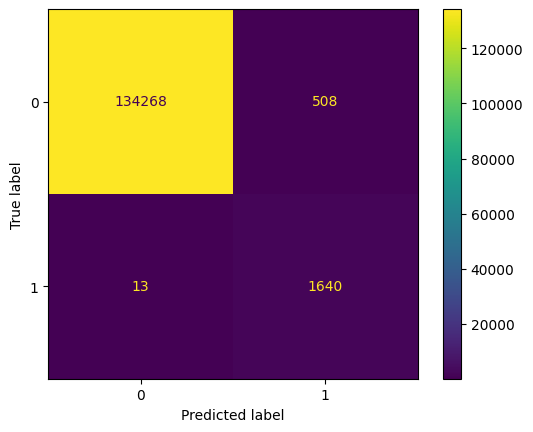

In [ ]:
C = 1.0  # SVM regularization parameter
model = svm.SVC(kernel="linear", C=C)
model.fit(X,y)
cm = confusion_matrix(model.predict(X), y)
# Display confusion matrix
cm_display = ConfusionMatrixDisplay(cm).plot()

TN,TP,FP,FN = cm[0,0],cm[1,1],cm[0,1],cm[1,0]
# Print some metrics alternative to prediction accuracy
print('True Negative rate (specificity): ', TN/(TN+FN))
print('True positive rate (recall): ', TP/(TP+FP))
print('False Negative Rate: ', 1-TP/(TP+FP))
print('False positive rate: ', 1-TN/(TN+FN))
print('Positive Likelihood ratio: ', TP/FP)

In [ ]:
# Save model with pickle
import pickle
import os
models_dir = 'models'
# Encoding of the filename is the following: modelname_KernelType_Cvalue_*otherParams.sav
filename = 'SVC_LinKer_1.sav'
# Save file in models
pickle.dump(model, open(os.path.join(models_dir,filename), 'wb'))

#### SVC with linear kernel usign LinearSVC implementation

True Negative rate (specificity):  0.9999031880906457
True positive rate (recall):  0.7635009310986964
False Negative Rate:  0.23649906890130357
False positive rate:  9.681190935428852e-05
Positive Likelihood ratio:  3.2283464566929134


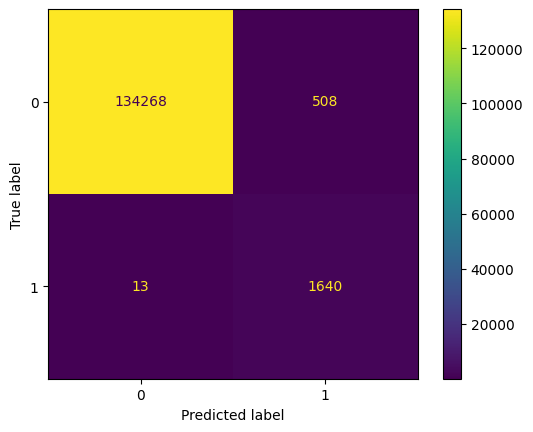

In [ ]:
C = 1.0  # SVM regularization parameter
model = svm.LinearSVC(C=C, max_iter=1000, dual="auto")
model.fit(X,y)
cm = confusion_matrix(model.predict(X), y)
cm_display = ConfusionMatrixDisplay(cm).plot()

TN,TP,FP,FN = cm[0,0],cm[1,1],cm[0,1],cm[1,0]
# Print some metrics alternative to prediction accuracy
print('True Negative rate (specificity): ', TN/(TN+FN))
print('True positive rate (recall): ', TP/(TP+FP))
print('False Negative Rate: ', 1-TP/(TP+FP))
print('False positive rate: ', 1-TN/(TN+FN))
print('Positive Likelihood ratio: ', TP/FP)

In [ ]:
# Save model with pickle
filename = 'LinearSVC_maxIter1000_dualAuto.sav'
pickle.dump(model, open(os.path.join(models_dir,filename), 'wb'))

#### SVC with polynomial kernel

True Negative rate (specificity):  0.9999031880906457
True positive rate (recall):  0.7402234636871509
False Negative Rate:  0.25977653631284914
False positive rate:  9.681190935428852e-05
Positive Likelihood ratio:  2.849462365591398


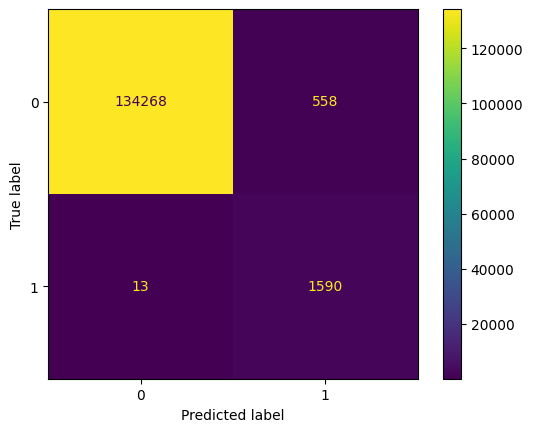

In [ ]:
C = 1  # SVM regularization parameter
model = svm.SVC(kernel="poly", degree=3, gamma="auto", C=C)
model.fit(X,y)
cm = confusion_matrix(model.predict(X), y)
cm_display = ConfusionMatrixDisplay(cm).plot()

TN,TP,FP,FN = cm[0,0],cm[1,1],cm[0,1],cm[1,0]
# Print some metrics alternative to prediction accuracy
print('True Negative rate (specificity): ', TN/(TN+FN))
print('True positive rate (recall): ', TP/(TP+FP))
print('False Negative Rate: ', 1-TP/(TP+FP))
print('False positive rate: ', 1-TN/(TN+FN))
print('Positive Likelihood ratio: ', TP/FP)

In [ ]:
# Save model with pickle
filename = 'SVC_PolyKer_1_deg3.sav'
pickle.dump(model, open(os.path.join(models_dir,filename), 'wb'))

#### SVC with radial basis function kernel

True Negative rate (specificity):  0.9999180822305463
True positive rate (recall):  0.7732774674115456
False Negative Rate:  0.22672253258845443
False positive rate:  8.191776945365437e-05
Positive Likelihood ratio:  3.410677618069815


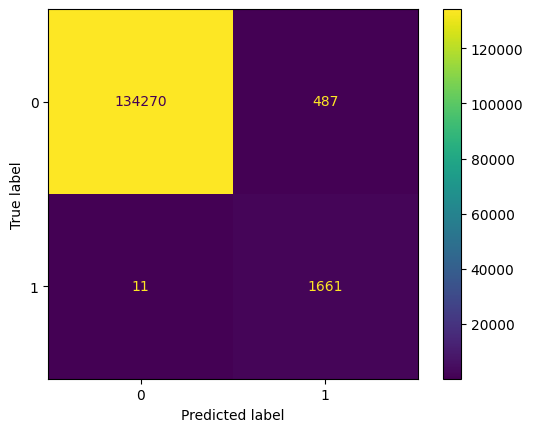

In [ ]:
C = 1  # SVM regularization parameter
model = svm.SVC(kernel="rbf", gamma=0.7, C=C)
model.fit(X,y)
cm = confusion_matrix(model.predict(X), y)
cm_display = ConfusionMatrixDisplay(cm).plot()

TN,TP,FP,FN = cm[0,0],cm[1,1],cm[0,1],cm[1,0]
# Print some metrics alternative to prediction accuracy
print('True Negative rate (specificity): ', TN/(TN+FN))
print('True positive rate (recall): ', TP/(TP+FP))
print('False Negative Rate: ', 1-TP/(TP+FP))
print('False positive rate: ', 1-TN/(TN+FN))
print('Positive Likelihood ratio: ', TP/FP)

In [ ]:
# Save model with pickle
filename = 'SVC_RbfKer_1_gamma7e-1.sav'
pickle.dump(model, open(os.path.join(models_dir,filename), 'wb'))

Try giving more weight to misclassification in loss minimization to same rbf kernel SVC

True Negative rate (specificity):  0.9998957410206954
True positive rate (recall):  0.7793296089385475
False Negative Rate:  0.22067039106145248
False positive rate:  0.00010425897930455008
Positive Likelihood ratio:  3.5316455696202533


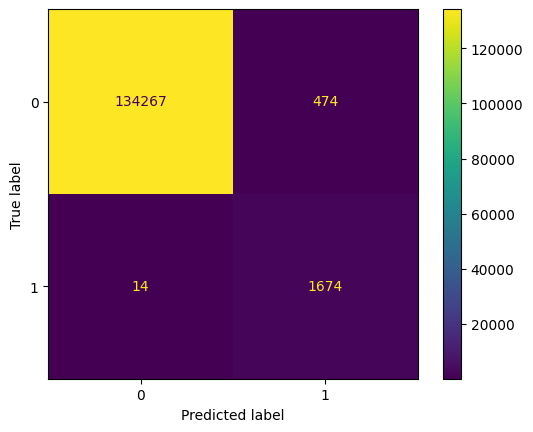

In [ ]:
# Try giving more weight to misclassification in loss minimization to same rbf kernel SVC
C = 2  # SVM regularization parameter
model = svm.SVC(kernel="rbf", gamma=0.7, C=C)
model.fit(X,y)
cm = confusion_matrix(model.predict(X), y)
cm_display = ConfusionMatrixDisplay(cm).plot()

TN,TP,FP,FN = cm[0,0],cm[1,1],cm[0,1],cm[1,0]
# Print some metrics alternative to prediction accuracy
print('True Negative rate (specificity): ', TN/(TN+FN))
print('True positive rate (recall): ', TP/(TP+FP))
print('False Negative Rate: ', 1-TP/(TP+FP))
print('False positive rate: ', 1-TN/(TN+FN))
print('Positive Likelihood ratio: ', TP/FP)

In [ ]:
# Save model with pickle
filename = 'SVC_RbfKer_2_gamma7e-1.sav'
pickle.dump(model, open(os.path.join(models_dir,filename), 'wb'))